# Exploration des données

In [2]:
### Imports 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import seaborn as sns

## Affichage des tableaux 

In [3]:
train_data = pd.read_csv( '../../data/train_airbnb_berlin.csv' , delimiter = ',')
train_data.head()

,Listing ID,Listing Name,Host ID,Host Name,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,...,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready,Price
0,19665213.0,*,156079597.0,Maximilian,2016-01-20,NaN,NaN,f,Prenzlauer Berg,Pankow,...,100.0,10.0,10.0,10.0,10.0,9.0,10.0,t,f,26.0
1,6436842.0,*,5302290.0,Dulie,2013-04-07,NaN,NaN,f,Pankow,Pankow,...,90.0,9.0,9.0,10.0,10.0,9.0,10.0,f,f,41.0
2,10559468.0,*,59151456.0,Geank,2016-02-07,NaN,NaN,f,Prenzlauer Berg,Pankow,...,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f,50.0
3,27215482.0,*,193452785.0,Alix,2018-06-26,NaN,NaN,f,Friedrichshain,Friedrichshain-Kreuzberg,...,100.0,10.0,10.0,10.0,10.0,10.0,9.0,f,f,50.0
4,27287546.0,*,205870244.0,Lurina,2013-05-16,within a few hours,92%,t,Prenzlauer Berg,Pankow,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f,55.0


In [6]:
test_data = pd.read_csv( '../../data/test_airbnb_berlin.csv' , delimiter = ',')
test_data.head()

,Listing ID,Listing Name,Host ID,Host Name,Host Since,Host Response Time,Host Response Rate,Is Superhost,neighbourhood,Neighborhood Group,...,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Business Travel Ready
0,13338017.0,*,19153032.0,Sonfron,15-06-2014,within a few hours,91%,t,Kreuzberg,Friedrichshain-Kreuzberg,...,05-05-2019,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,f
1,2899239.0,*,1629859.0,Welgin,11-02-2011,within an hour,100%,f,Friedrichshain,Friedrichshain-Kreuzberg,...,27-02-2019,75.0,8.0,5.0,8.0,8.0,9.0,7.0,f,f
2,441586.0,*,153205.0,Leenamdr,12-05-2010,NaN,NaN,f,Friedrichshain,Friedrichshain-Kreuzberg,...,24-06-2017,94.0,10.0,9.0,10.0,9.0,9.0,9.0,t,f
3,19036720.0,*,129571502.0,Bertra&ÃGisn,07-03-2017,NaN,NaN,f,Tempelhof,Tempelhof - SchÃ¶neberg,...,04-11-2018,96.0,10.0,10.0,10.0,10.0,9.0,9.0,t,f
4,17890052.0,*,28992128.0,Soscus,29-04-2015,within a day,67%,f,Friedrichshain,Friedrichshain-Kreuzberg,...,30-03-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,f


In [8]:
#Shapes : 
print(f'Shape of the train : {train_data.shape}')
print(f'Shape of the test : {test_data.shape}')

Shape of the train : (15692, 39)
Shape of the test : (7842, 38)


In [12]:
#Features of our challenge : 
print(f' Les features que nous allons étudier sont : {train_data.columns}')

 Les features que nous allons étudier sont : Index(['Listing ID', 'Listing Name', 'Host ID', 'Host Name', 'Host Since',
       'Host Response Time', 'Host Response Rate', 'Is Superhost',
       'neighbourhood', 'Neighborhood Group', 'City', 'Postal Code',
       'Country Code', 'Country', 'Latitude', 'Longitude', 'Is Exact Location',
       'Property Type', 'Room Type', 'Accomodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Square Feet', 'Guests Included', 'Min Nights', 'Reviews',
       'First Review', 'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable',
       'Business Travel Ready', 'Price'],
      dtype='object')


### Affichage des informations globale pour se faire une idée des données 

In [82]:
train_data.describe()

,Listing ID,Host ID,Latitude,Longitude,Square Feet,Reviews,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Price
count,1.569100e+04,1.569200e+04,15692.000000,15692.000000,303.000000,15692.000000,12730.000000,12721.000000,12722.000000,12719.000000,12722.000000,12721.000000,12720.000000,15683.000000
mean,1.780062e+07,6.119042e+07,52.509893,13.407334,445.900990,19.452014,94.717282,9.717475,9.328407,9.769164,9.779201,9.556874,9.458097,60.342983
std,9.952544e+06,6.739421e+07,0.031286,0.058646,414.817342,39.483853,7.069787,0.671793,1.023807,0.620347,0.619545,0.731109,0.788891,48.829687
min,2.241500e+04,1.101500e+04,52.369270,13.121400,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,8.000000
25%,9.052831e+06,9.274528e+06,52.488920,13.376025,0.000000,1.000000,93.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,32.000000
50%,1.865037e+07,3.358182e+07,52.509100,13.417250,440.000000,5.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,49.000000
75%,2.611308e+07,9.325677e+07,52.532713,13.439750,700.000000,17.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,70.000000
max,3.467450e+07,2.609698e+08,52.639670,13.709020,1912.000000,424.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,900.000000


In [83]:
print('\n ########## Première Colonne ######## \n')
for column in train_data.columns:
    print(f' *** On etudie la colonne : {column} *** \n ')
    print(' 10 Samples pour chaque colonne ')
    print(train_data[column].sample(10))
    print('\n Decompte des valeurs pour chaque colonne ')
    count=train_data[column].value_counts()
    print(count)
    print('\n ########## Colonne suivante ######## \n')


 ########## Première Colonne ######## 

 *** On etudie la colonne : Listing ID *** 
 
 10 Samples pour chaque colonne 
10754     3577505.0
3793     16141640.0
69         139732.0
3010        29052.0
565      34207125.0
8022      5536840.0
9239     33891225.0
14741    22296447.0
2044     23103408.0
2401      1629770.0
Name: Listing ID, dtype: float64

 Decompte des valeurs pour chaque colonne 
34674496.0    18
22415.0        5
7634930.0      2
32809683.0     2
26675782.0     1
              ..
23453981.0     1
20547759.0     1
13022969.0     1
12297376.0     1
32774348.0     1
Name: Listing ID, Length: 15668, dtype: int64

 ########## Colonne suivante ######## 

 *** On etudie la colonne : Listing Name *** 
 
 10 Samples pour chaque colonne 
8907     *
15523    *
14791    *
9933     *
15165    *
13195    *
12945    *
14150    *
3005     *
15261    *
Name: Listing Name, dtype: object

 Decompte des valeurs pour chaque colonne 
*    15638
Name: Listing Name, dtype: int64

 ########## Col

### Connaitre la quantité de valeur manquante pour chaque feature : 

<BarContainer object of 39 artists>

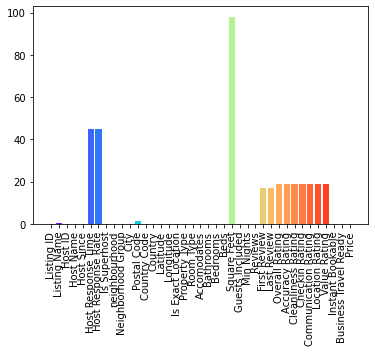

In [65]:
pourcentage_manquant=train_data.isnull().sum()/train_data.shape[0]*100
features= pourcentage_manquant.keys().values.tolist()
plt.xticks(rotation = '90')
plt.bar(features,pourcentage_manquant, color = cm.rainbow(np.linspace(0, 1, 39)))

#### On observe que square feet possede presque 100 pourcent de valeurs manquante, donc on peut supposer qu'on peut la drop 

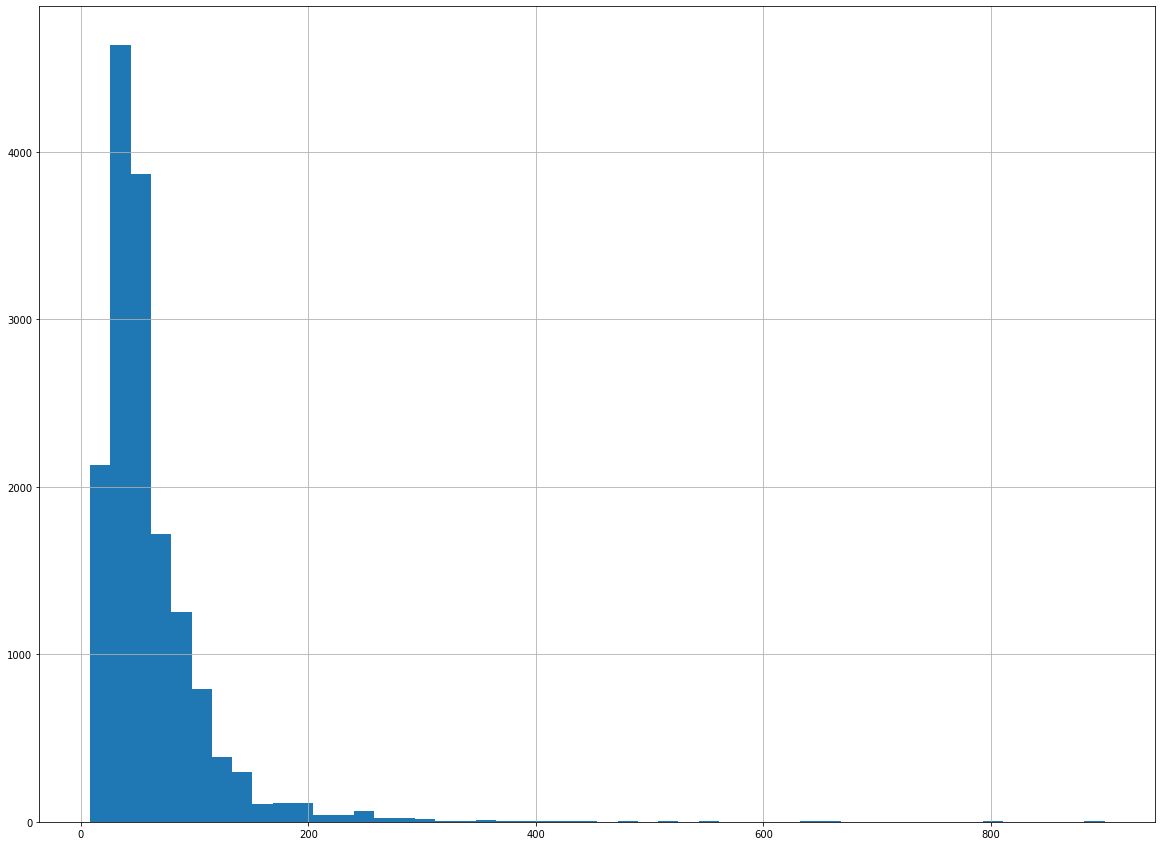

In [19]:
train_data['Price'].hist(bins=50, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

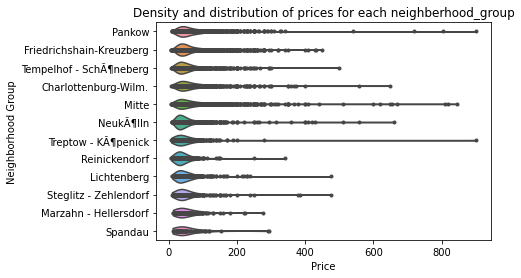

In [29]:
viz=sns.violinplot(data=train_data, x='Price',y='Neighborhood Group',inner='points',cut=0)
viz.set_title('Density and distribution of prices for each neighberhood_group')

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

/Users/leilaberrada/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/leilaberrada/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 159 missing from current font.
  font.set_text(s, 0, flags=flags)


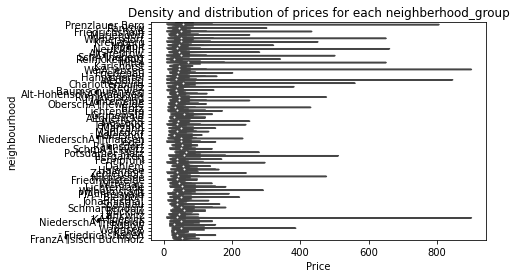

In [30]:
viz_2=sns.violinplot(data=train_data, x='Price',y='neighbourhood',scale_hue=True, cut=0)
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

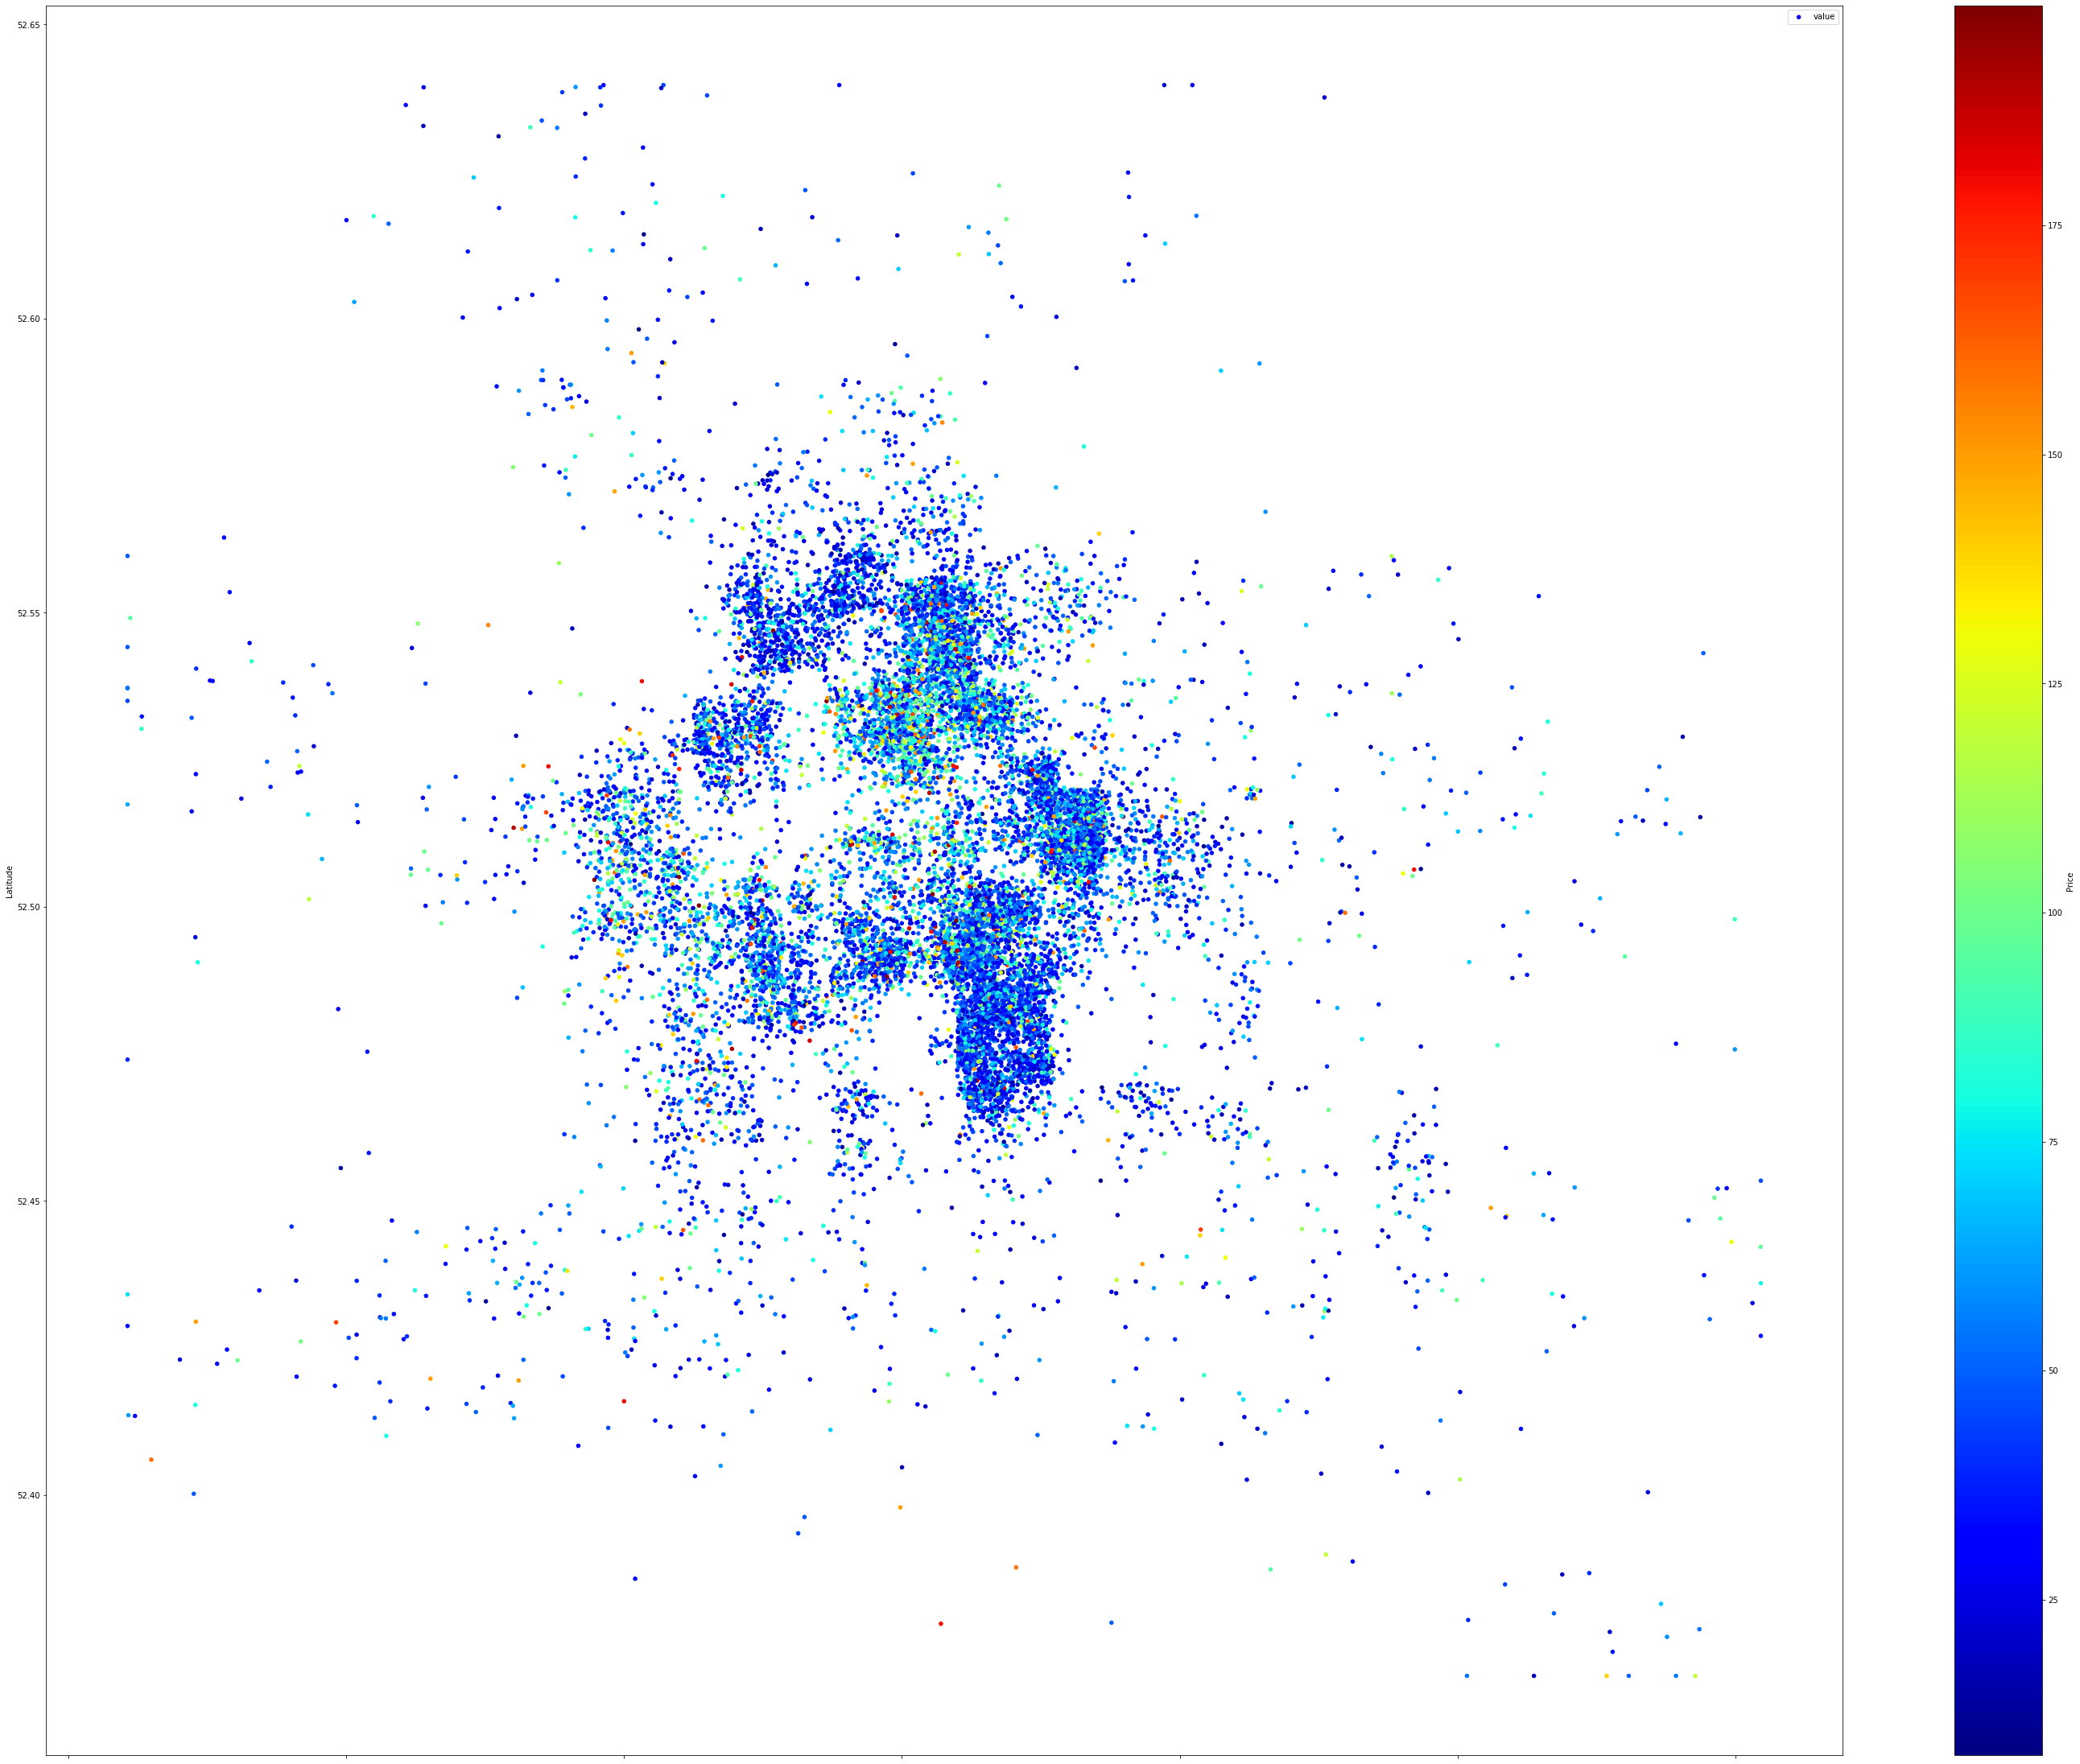

In [72]:
viz_4=train_data[train_data['Price']<200].plot(kind='scatter', x='Longitude', y='Latitude',label='value', c='Price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=1, figsize=(50,40))
viz_4.legend()

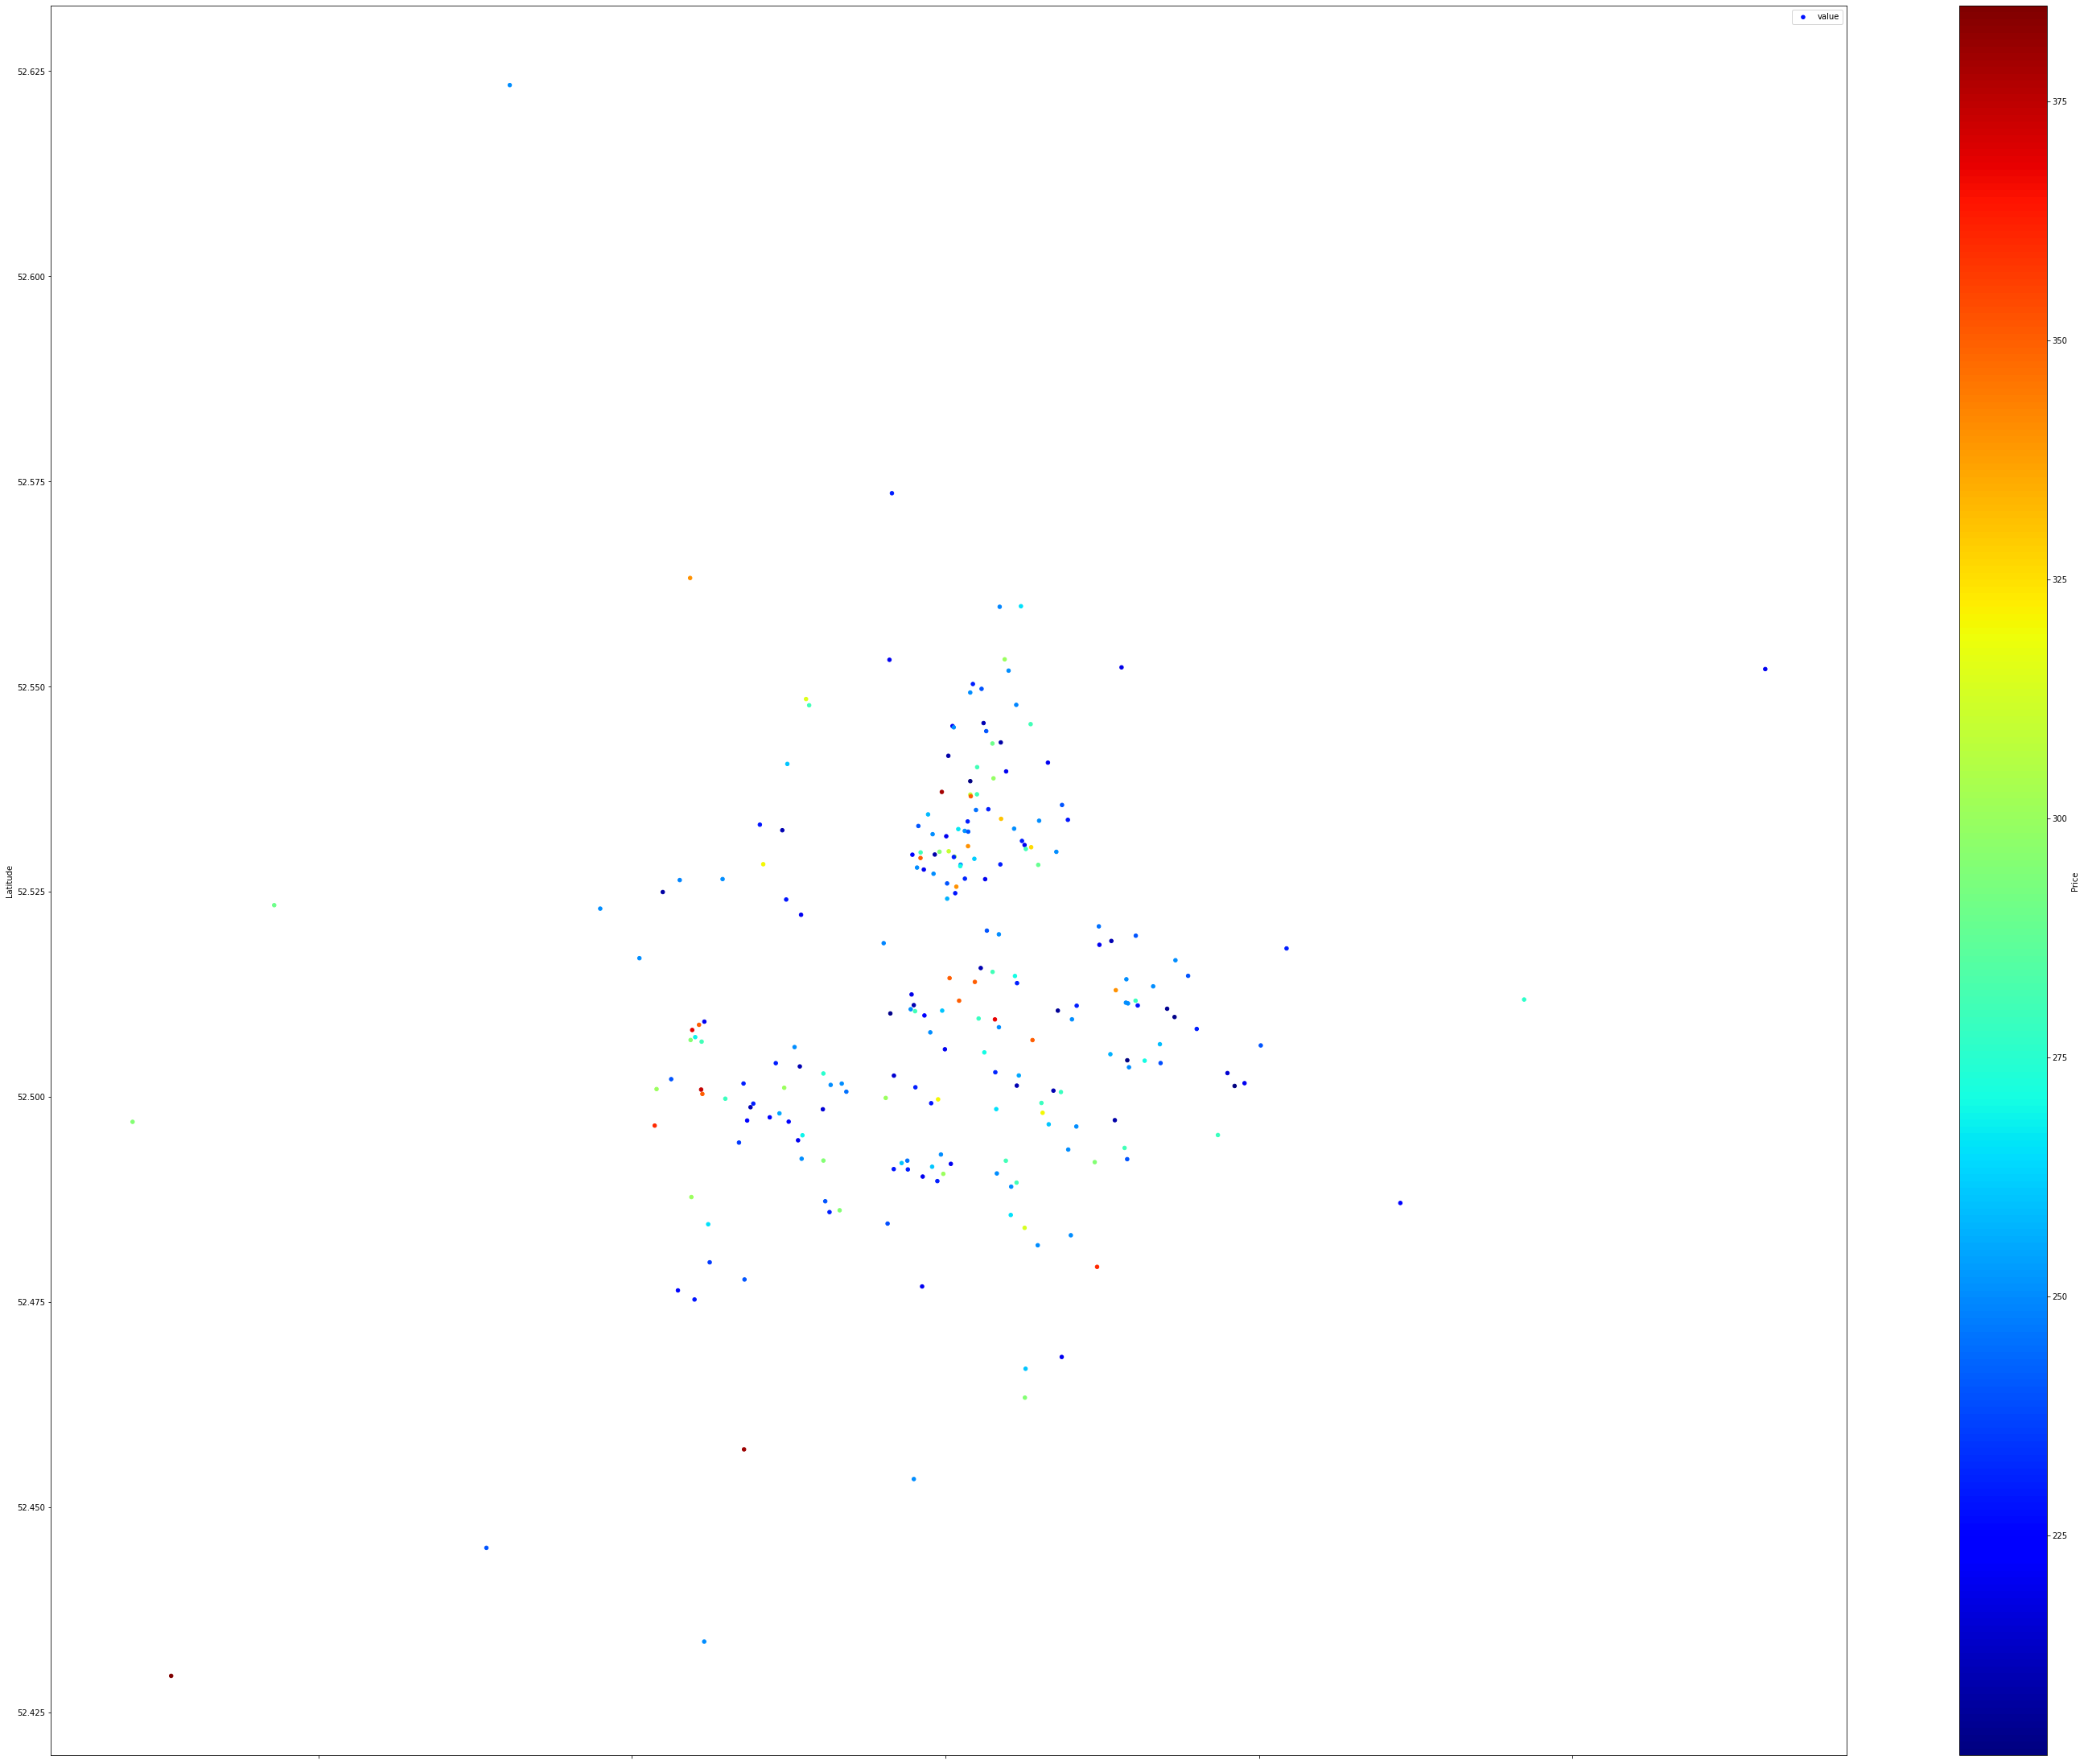

In [77]:
test=train_data[train_data['Price']<400]
test=test[test['Price']>200]
viz_4=test.plot(kind='scatter', x='Longitude', y='Latitude',label='value', c='Price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=1, figsize=(50,40))
viz_4.legend()

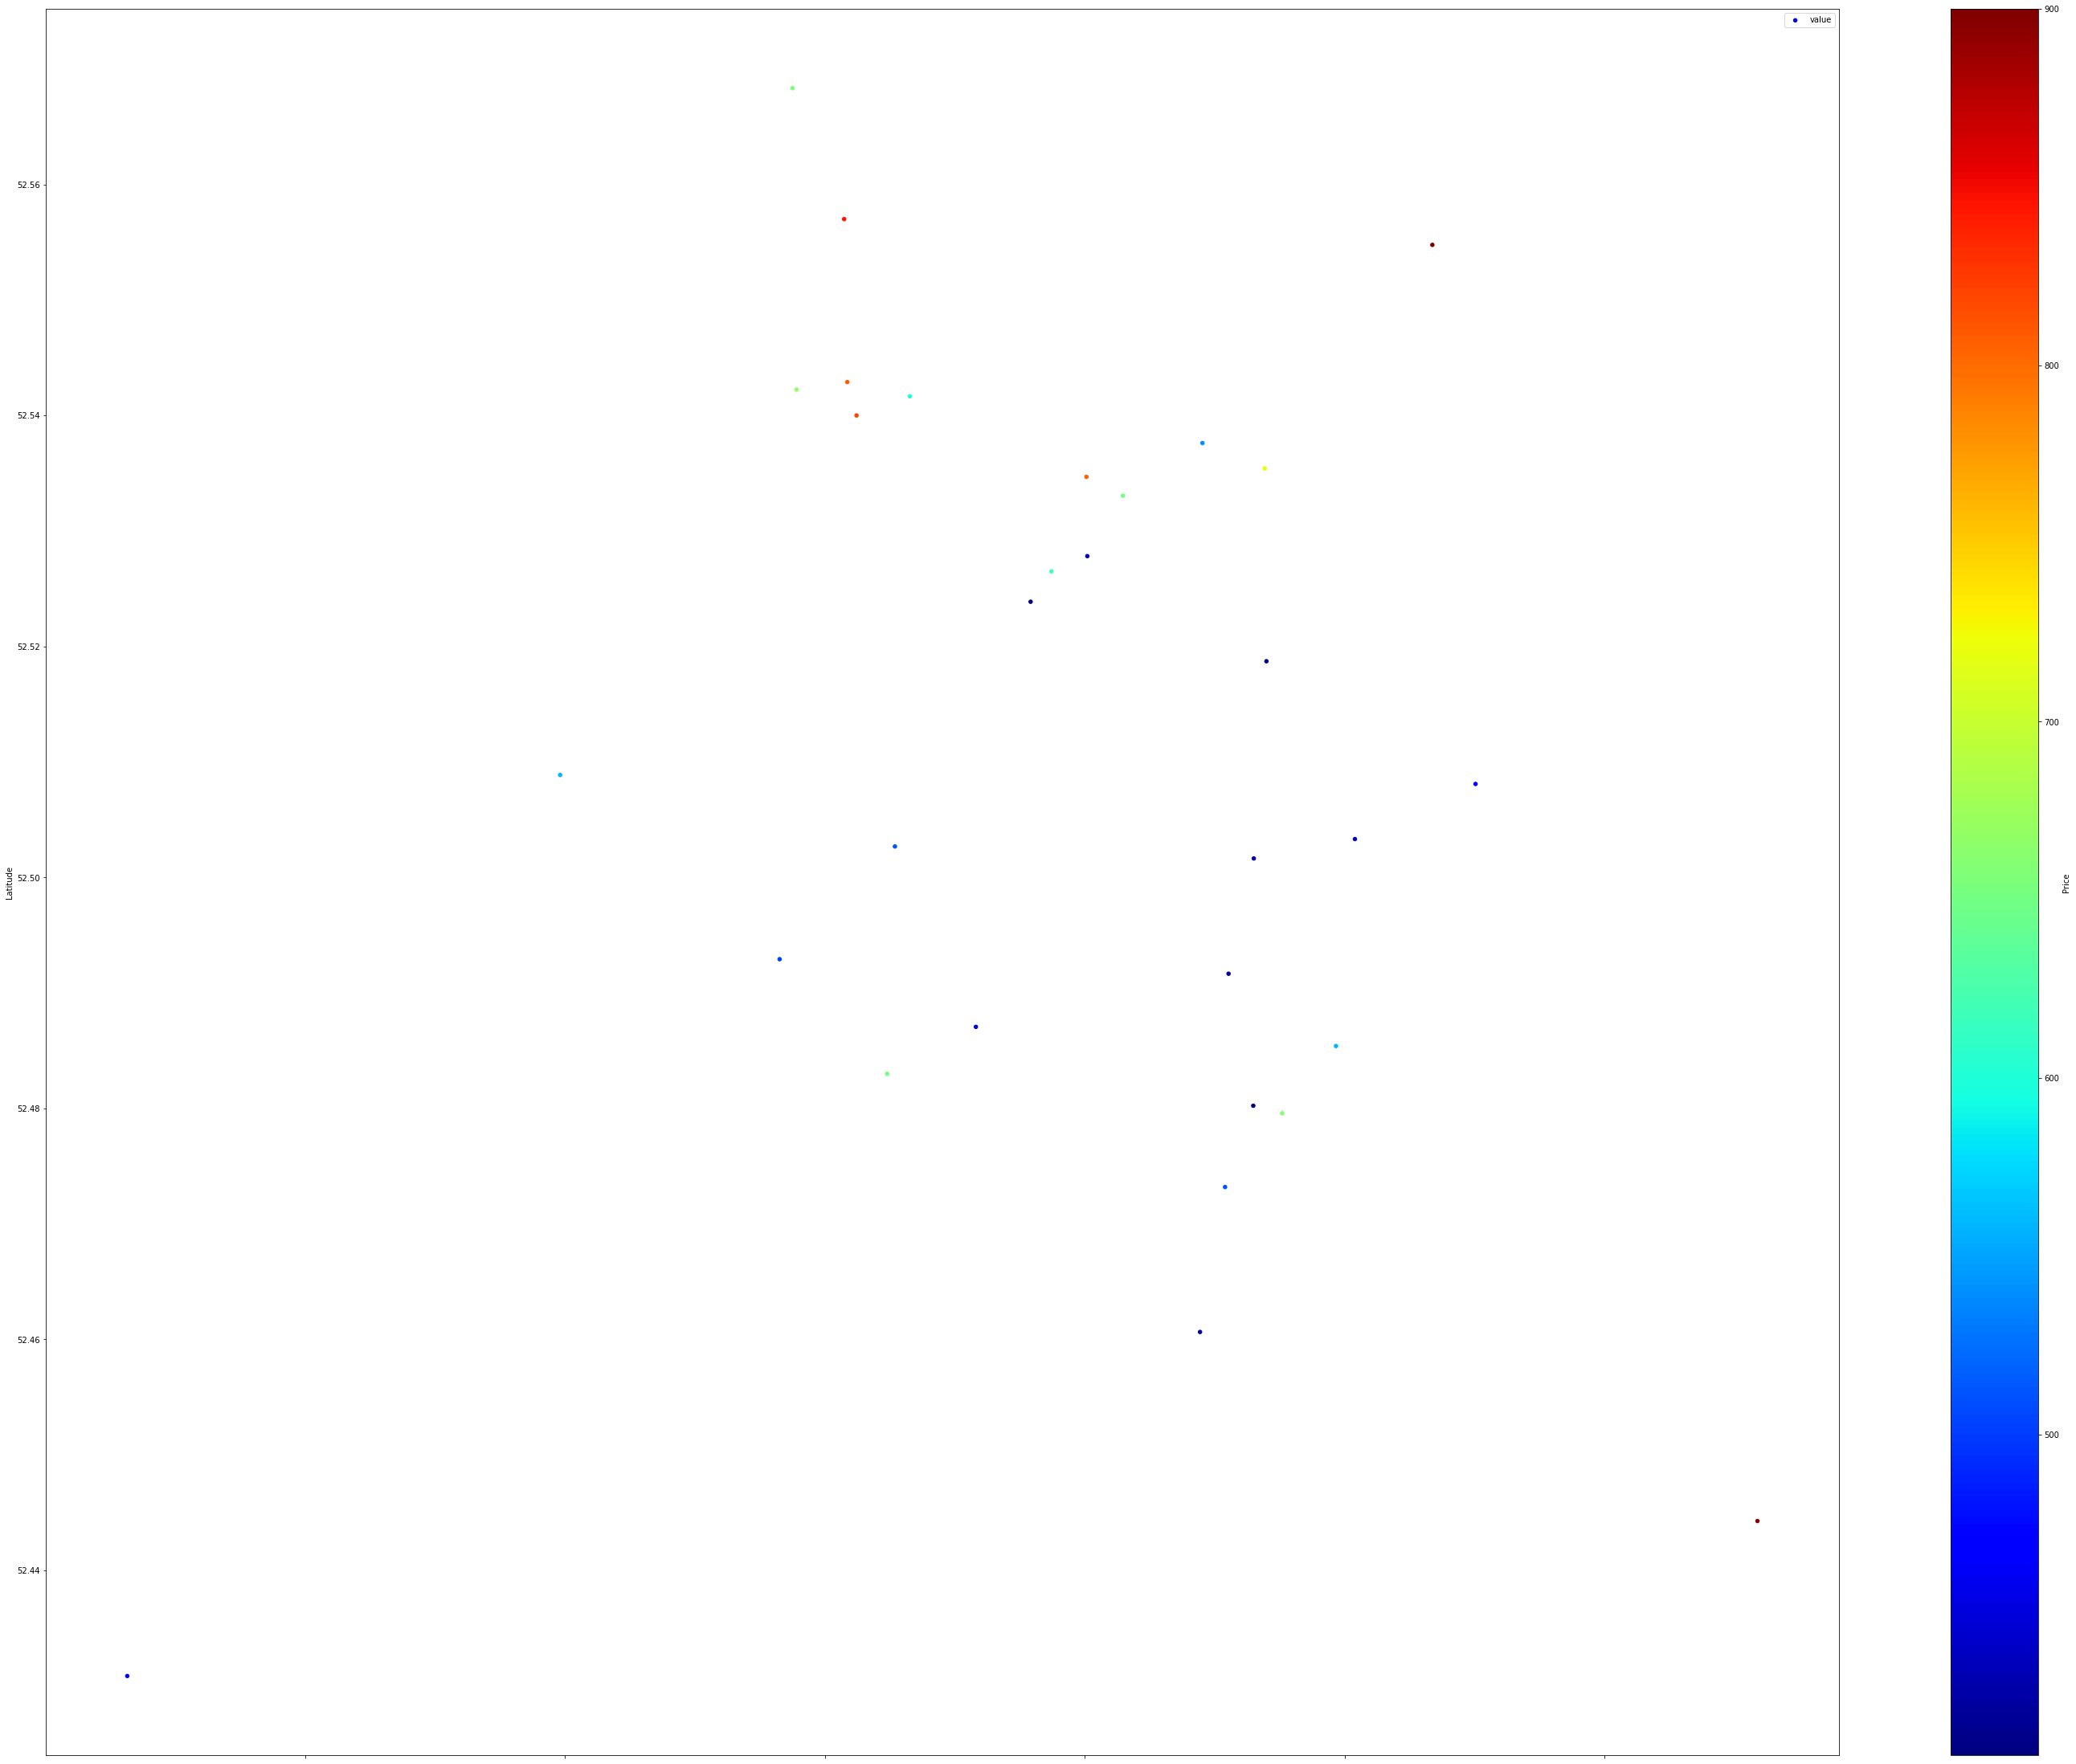

In [78]:
test=train_data[train_data['Price']>400]
viz_4=test.plot(kind='scatter', x='Longitude', y='Latitude',label='value', c='Price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=1, figsize=(50,40))
viz_4.legend()

[[52.54652 13.41792]
 [52.56512 13.42214]
 [52.54741 13.42521]
 ...
 [52.54196 13.34179]
 [52.47179 13.33103]
 [52.509   13.49387]]


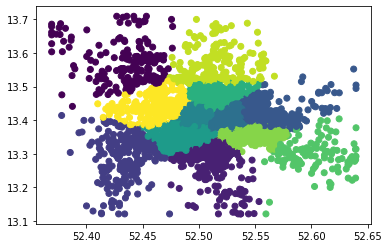

In [106]:
### Clustering sur les quartiers 
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans2, whiten

mycolumns = ['Latitude','Longitude']
test=train_data[mycolumns]
coordinates = test.values
print(coordinates)
x, y = kmeans2(whiten(coordinates), 12, iter = 20)  
plt.scatter(coordinates[:,0], coordinates[:,1], c=y)
plt.show()